In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import re
import email
from email.header import decode_header
from bs4 import BeautifulSoup  # Import BeautifulSoup for HTML parsing
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
os.getcwd()

'/Users/shiv/Desktop/Portfolio Project/Expense_Tracker'

## Importing Contents from Mail


In [3]:
import imaplib
import email
from email.header import decode_header

In [4]:
# Email account details
email_username = "shivbhanusingh08@gmail.com"
email_password = "oeijzfojqadbiolk"
imap_server = "imap.gmail.com"


In [5]:
# Connect to the IMAP server
mail = imaplib.IMAP4_SSL(imap_server)
mail.login(email_username, email_password)

# Get the list of mailbox names
status, mailbox_list = mail.list()

if status == "OK":
    # Loop through the mailbox list
    for mailbox_info in mailbox_list:
        # Decode and print mailbox name
        _, mailbox_name = mailbox_info.decode().split(' "/" ')
        print(mailbox_name)

"Amazon"
"Ambition Box"
"Bharat BIG"
"Drafts"
"Guitar Tricks"
"HDFC"
"INBOX"
"Low Level Simp"
"MMT"
"Market Breifs"
"Reddit"
"TLDR"
"[Gmail]"
"[Gmail]/All Mail"
"[Gmail]/Drafts"
"[Gmail]/Important"
"[Gmail]/Sent Mail"
"[Gmail]/Spam"
"[Gmail]/Starred"
"[Gmail]/Trash"
"iim jobs"


In [6]:
# Select a mailbox (e.g., 'inbox')
mailbox =  "HDFC"
mail.select(mailbox)

search_keywords = [  "alerts@hdfcbank.net"]

# Use this to search for specific senders
search_query = " OR ".join(f'FROM "{keyword}"' for keyword in search_keywords)
search_query

'FROM "alerts@hdfcbank.net"'

In [7]:
status, email_ids = mail.search(None, search_query)
email_id_list = email_ids[0].split()
len(email_id_list)

4172

## Testing Sample mail data

In [8]:
# Testing the mail data
status, msg_data = mail.fetch('6308', "(BODY[])")
msg_bytes = msg_data[0][1]

def decode_header_str(header_str):
    decoded_str = ""
    for part, encoding in decode_header(header_str):
        if isinstance(part, bytes):
            decoded_str += part.decode(encoding or 'utf-8', errors="ignore")
        else:
            decoded_str += part
    return decoded_str

msg_bytes = msg_data[0][1]  # Assuming msg_data is a tuple
    
    # Parse the email using the email library
msg = email.message_from_bytes(msg_bytes)

print(decode_header_str(msg['Subject']))
print(decode_header_str(msg['From']))
print(decode_header_str(msg['Date']))

plain_text_body = ""

# Walk through message parts
for part in msg.walk():
    content_type = part.get_content_type()
    content_disposition = str(part.get('Content-Disposition'))
    
    # Extract plain text body
    if content_type == "text/plain" and "attachment" not in content_disposition:
        payload = part.get_payload(decode=True)
        charset = part.get_content_charset() or 'utf-8'  # Use 'utf-8' if charset is None
        plain_text_body = payload.decode(charset, errors="ignore")
        break
    # If plain text body is not found, try extracting from HTML
    elif content_type == "text/html" and "attachment" not in content_disposition and not plain_text_body:
        payload = part.get_payload(decode=True)
        charset = part.get_content_charset() or 'utf-8'  # Use 'utf-8' if charset is None
        html_body = payload.decode(charset, errors="ignore")
        soup = BeautifulSoup(html_body, "html.parser")
        plain_text_body = soup.get_text()

# Now you can use the plain_text_body variable
print(plain_text_body)

❗ You have done a UPI txn. Check details!
HDFC Bank InstaAlerts <alerts@hdfcbank.net>
Tue, 29 Aug 2023 20:45:00 +0530









HDFC BANK



































































Dear Customer,  Rs.499.00 has been debited from account **4809 to VPA billdeskpg.appleservices@hdfcbank on 29-08-23. Your UPI transaction reference number is 324137441641.  Please call on 18002586161 to report if this transaction was not authorized by you.  Warm Regards, HDFC Bank


































For more details on Service charges and Fees,  click here.


© HDFC Bank 







## Importing Lifetime Data : One time task

In [9]:
# import email
# from email.header import decode_header
# from bs4 import BeautifulSoup  # Import BeautifulSoup for HTML parsing


# email_data_dict = {}

# # Function to decode headers
# def decode_header_str(header_str):
#     decoded_str = ""
#     for part, encoding in decode_header(header_str):
#         if isinstance(part, bytes):
#             decoded_str += part.decode(encoding or 'utf-8', errors="ignore")
#         else:
#             decoded_str += part
#     return decoded_str

# email_id_list = email_ids[0].split()

# for email_id in email_id_list:
#     status, msg_data = mail.fetch(email_id, "(BODY[])")
    
#     # Assuming msg_data is the raw email data you received
#     msg_bytes = msg_data[0][1]  # Assuming msg_data is a tuple
    
#     # Parse the email using the email library
#     msg = email.message_from_bytes(msg_bytes)
    
#     # Extract email headers
#     subject = decode_header_str(msg['Subject'])
#     from_address = decode_header_str(msg['From'])
#     date_sent = decode_header_str(msg['Date'])

#     plain_text_body = ""

#     # Walk through message parts
#     for part in msg.walk():
#         content_type = part.get_content_type()
#         content_disposition = str(part.get('Content-Disposition'))
        
#         # Extract plain text body
#         if content_type == "text/plain" and "attachment" not in content_disposition:
#             payload = part.get_payload(decode=True)
#             charset = part.get_content_charset() or 'utf-8'  # Use 'utf-8' if charset is None
#             plain_text_body = payload.decode(charset, errors="ignore")
#             break
#         # If plain text body is not found, try extracting from HTML
#         elif content_type == "text/html" and "attachment" not in content_disposition and not plain_text_body:
#             payload = part.get_payload(decode=True)
#             charset = part.get_content_charset() or 'utf-8'  # Use 'utf-8' if charset is None
#             html_body = payload.decode(charset, errors="ignore")
#             soup = BeautifulSoup(html_body, "html.parser")
#             plain_text_body = soup.get_text()
    
#     # Now you can use the plain_text_body variable

    
#     # Create a dictionary with email information
#     email_info = {
#         'subject': subject,
#         'sender_mail': from_address,
#         'date_sent': date_sent,
#         'plain_text_body': plain_text_body
#     }
    
#     # Store the email information in the email_data_dict using email_id as key
#     email_data_dict[email_id.decode('utf-8')] = email_info
    
#     print("Email_id ", email_id, ": Done")
    

#     # Print the extracted information
# #     print("Subject:", subject)
# #     print("From:", from_address)
# #     print("Date:", date_sent)
# #     print("Plain Text Body:", plain_text_body)

# print(len(email_data_dict.values()))
# df = pd.DataFrame.from_dict(email_data_dict, orient='index')
# df.reset_index(inplace = True)
# df = df.rename(columns = {'index' :  'email_id'})
# df.to_csv(r'hdfc_email_data.csv', index = False)

## Fetching Information only for last 5 days

In [10]:
# Calculate the date range for the last 2 days
from datetime import datetime, timedelta

end_date = datetime.now() + timedelta(days=1)
start_date = datetime.now() - timedelta(days=5)
date_format = "%d-%b-%Y"  # Format used in Gmail IMAP search queries

# Convert dates to Gmail IMAP search query format
start_date_str = start_date.strftime(date_format)
end_date_str = end_date.strftime(date_format)

In [11]:
# Create a search query to filter emails by sender and date range
search_keywords = ["alerts@hdfcbank.net"]
search_query = f'(FROM {" OR ".join(search_keywords)}) (SINCE {start_date_str}) (BEFORE {end_date_str})'

search_query


'(FROM alerts@hdfcbank.net) (SINCE 28-Aug-2023) (BEFORE 03-Sep-2023)'

In [12]:
status, id_last_five = mail.search(None, search_query)

In [13]:
id_last_five[0]

b'6307 6308 6309 6310 6311 6312 6313 6314 6315 6316 6317 6318 6319 6320 6321 6322 6323 6324 6327'

In [14]:
import email
from email.header import decode_header
from bs4 import BeautifulSoup  # Import BeautifulSoup for HTML parsing


email_data_l5 = {}

# Function to decode headers
def decode_header_str(header_str):
    decoded_str = ""
    for part, encoding in decode_header(header_str):
        if isinstance(part, bytes):
            decoded_str += part.decode(encoding or 'utf-8', errors="ignore")
        else:
            decoded_str += part
    return decoded_str

email_id_list = id_last_five[0].split()

for email_id in email_id_list:
    status, msg_data = mail.fetch(email_id, "(BODY[])")
    
    # Assuming msg_data is the raw email data you received
    msg_bytes = msg_data[0][1]  # Assuming msg_data is a tuple
    
    # Parse the email using the email library
    msg = email.message_from_bytes(msg_bytes)
    
    # Extract email headers
    subject = decode_header_str(msg['Subject'])
    from_address = decode_header_str(msg['From'])
    date_sent = decode_header_str(msg['Date'])

    plain_text_body = ""

    # Walk through message parts
    for part in msg.walk():
        content_type = part.get_content_type()
        content_disposition = str(part.get('Content-Disposition'))
        
        # Extract plain text body
        if content_type == "text/plain" and "attachment" not in content_disposition:
            payload = part.get_payload(decode=True)
            charset = part.get_content_charset() or 'utf-8'  # Use 'utf-8' if charset is None
            plain_text_body = payload.decode(charset, errors="ignore")
            break
        # If plain text body is not found, try extracting from HTML
        elif content_type == "text/html" and "attachment" not in content_disposition and not plain_text_body:
            payload = part.get_payload(decode=True)
            charset = part.get_content_charset() or 'utf-8'  # Use 'utf-8' if charset is None
            html_body = payload.decode(charset, errors="ignore")
            soup = BeautifulSoup(html_body, "html.parser")
            plain_text_body = soup.get_text()
    
    # Now you can use the plain_text_body variable

    
    # Create a dictionary with email information
    email_info = {
        'subject': subject,
        'sender_mail': from_address,
        'date_sent': date_sent,
        'plain_text_body': plain_text_body
    }
    
    # Store the email information in the email_data_dict using email_id as key
    email_data_l5[email_id.decode('utf-8')] = email_info
    
    print("Email_id ", email_id, ": Done")
    

    # Print the extracted information
#     print("Subject:", subject)
#     print("From:", from_address)
#     print("Date:", date_sent)
#     print("Plain Text Body:", plain_text_body)


Email_id  b'6307' : Done
Email_id  b'6308' : Done
Email_id  b'6309' : Done
Email_id  b'6310' : Done
Email_id  b'6311' : Done
Email_id  b'6312' : Done
Email_id  b'6313' : Done
Email_id  b'6314' : Done
Email_id  b'6315' : Done
Email_id  b'6316' : Done
Email_id  b'6317' : Done
Email_id  b'6318' : Done
Email_id  b'6319' : Done
Email_id  b'6320' : Done
Email_id  b'6321' : Done
Email_id  b'6322' : Done
Email_id  b'6323' : Done
Email_id  b'6324' : Done
Email_id  b'6327' : Done


In [15]:
len(email_data_l5.keys())

19

## Adding Last 5 Days data to universe : Upsert Mode

In [16]:
df_l5 = pd.DataFrame.from_dict(email_data_l5, orient='index').copy()
df_l5.reset_index(inplace = True)
df_l5 = df_l5.rename(columns = {'index' :  'email_id'})
df_l5.to_csv(r'hdfc_email_data_l5.csv', index = False)

In [17]:
df_l5.shape

(19, 5)

In [18]:
df_hist = pd.read_csv(r'hdfc_email_data.csv')
df_l5 = pd.read_csv('hdfc_email_data_l5.csv')

In [19]:
df_hist.dtypes

email_id            int64
subject            object
sender_mail        object
date_sent          object
plain_text_body    object
dtype: object

In [20]:
df_l5.dtypes

email_id            int64
subject            object
sender_mail        object
date_sent          object
plain_text_body    object
dtype: object

In [21]:
df_new  = pd.concat([df_hist, df_l5]).drop_duplicates()

In [22]:
df_new.shape

(4172, 5)

In [23]:
df_new.dtypes

email_id            int64
subject            object
sender_mail        object
date_sent          object
plain_text_body    object
dtype: object

In [24]:
# Updating the dataset : After Upsert
df_new.to_csv(r'hdfc_email_data.csv', index = False)

## Processing Columns of new dataframe

In [25]:
# removing escape characters from the string of body
df_new['plain_text_body_v2'] = df_new['plain_text_body'].apply(lambda x:re.sub(r'[\n\t\r]+', ' ', x) )

In [26]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)

In [27]:
from datetime import datetime
from pytz import timezone
# Define the timezones
utc_tz = timezone('UTC')
ist_tz = timezone('Asia/Kolkata')  # IST timezone


# Function to convert a date-time string to IST
def convert_to_ist(datetime_str):
    # Remove possible (IST) suffix
    
    if datetime_str.endswith('(IST)') or '+0530' in datetime_str :
        datetime_str = datetime_str.replace('(IST)', '').replace('(UTC)', '').strip()
        dt_naive = datetime.strptime(datetime_str, '%a, %d %b %Y %H:%M:%S %z')
        dt_ist = dt_naive.astimezone(ist_tz)
       
    elif datetime_str.endswith('(UTC)') or '+0000' in datetime_str  :
        datetime_str = datetime_str.replace('(IST)', '').replace('(UTC)', '').strip()
        dt_naive = datetime.strptime(datetime_str, '%a, %d %b %Y %H:%M:%S %z')
        dt_utc = utc_tz.localize(dt_naive.replace(tzinfo=None))
        dt_ist = dt_utc.astimezone(ist_tz)

    else :
        datetime_str = datetime_str.replace('(IST)', '').replace('(UTC)', '').strip()
        dt_naive = datetime.strptime(datetime_str, '%a, %d %b %Y %H:%M:%S %z')
        dt_utc = utc_tz.localize(dt_naive.replace(tzinfo=None))
        dt_ist = dt_utc.astimezone(ist_tz)
    return dt_ist

In [28]:
df_new['date_sent_new'] = df_new['date_sent'].apply(convert_to_ist)
df_new['timestamp'] = pd.to_datetime(df_new['date_sent_new'])
# .apply(lambda x: int(x.timestamp()))

In [29]:
df_new.head(200)

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp
0,1,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 21:37:39 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n\n\r\n\t\tGet quick access to your banking needs.\r\n\r\nDownload HDFC Bank \r\n\t\t\t MobileApp. \n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. Get quick access to your banking needs. Download HDFC Bank MobileApp. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-21 21:37:39+05:30,2022-09-21 21:37:39+05:30
1,5,Alert : Update on your HDFC Bank Credit Card,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 16:40:06 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here

In [30]:
print(datetime.strptime('Thu, 31 Aug 2023 14:47:23 +0000', '%a, %d %b %Y %H:%M:%S %z'))

2023-08-31 14:47:23+00:00


In [31]:
# Formatting the date time column to further process it.
# df_new['date_sent_new'] = df_new['date_sent'].str.split('+').str.get(0).str.strip()

In [32]:
# df_new['timestamp'] = pd.to_datetime( df_new['date_sent'], format = "%a, %d %b %Y %H:%M:%S")
# Converting processed date time to timestamp after parsing  : to yyyy-mm-dd format
# from dateutil.parser import parse
# df_new['timestamp'] = pd.to_datetime(df_new['date_sent_new'].apply(lambda x: parse(x)))

In [33]:
# getting all information related to date time 
df_new['date'] = df_new['timestamp'].dt.date
df_new['hour'] = df_new['timestamp'].dt.hour
df_new['day_of_week'] = df_new['timestamp'].dt.strftime('%a')
df_new['day_of_month'] = df_new['timestamp'].dt.day
df_new['year'] = df_new['timestamp'].dt.year
df_new['month'] = df_new['timestamp'].dt.month
df_new['month_text'] = df_new['timestamp'].dt.strftime('%b')
# df_new[(df_new['year'] == 2023) & (df_new['month'] == 8 ) & (df_new['day_of_month'] == 29 ) ].head()

In [34]:
df_new.to_csv(r'hdfc_updated_data.csv', index = False)

In [35]:
df_new.sort_values(['date'], ascending = False).head()

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text
18,6327,❗ You have done a UPI txn. Check details!,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Sat, 2 Sep 2023 10:25:49 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\nDear Customer, Rs.199.00 has been debited from account **4809 to VPA billdeskpg.appleservices@hdfcbank on 02-09-23. Your UPI transaction reference number is 324547164455. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFor more details on Service charges and Fees, click here.\n\n\n© HDFC Bank \n\n\n\n\n","HDFC BANK Dear Customer, Rs.199.00 has been debited from account **4809 to VPA billdeskpg.appleservices@hdfcbank on 02-09-23. Your UPI transaction reference number is 324547164455. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank For more details on Service charges and Fees, click here. © HDFC Bank",2023-09-02 15:55:49+05:30,2023-09-02 15:55:49+05:30,2023-09-02,15,Sat,2,2023,9,Sep
17,6324,❗ You have done a UPI txn. Check details!,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Fri, 1 Sep 2023 18:54:59 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\nDear Customer, Rs.241.00 has been debited from account **4809 to VPA swiggyinstamart@yespay on 02-09-23. Your UPI transaction reference number is 324505284702. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFor more details on Service charges and Fees, click here.\n\n\n© HDFC Bank \n\n\n\n\n","HDFC BANK Dear Customer, Rs.241.00 has been debited from account **4809 to VPA swiggyinstamart@yespay on 02-09-23. Your UPI transaction reference number is 324505284702. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank For more details on Service charges and Fees, click here. © HDFC Bank",2023-09-02 00:24:59+05:30,2023-09-02 00:24:59+05:30,2023-09-02,0,Sat,2,2023,9,Sep
16,6323,❗ You have done a UPI txn. Check details!,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Fri, 1 Sep 2023 18:48:19 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\nDear Customer, Rs.267.00 has been debited from account **4809 to VPA swiggyupi@axisbank on 02-09-23. Your UPI transaction reference number is 324524208841. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFor more details on Service charges and Fees, click here.\n\n\n© HDFC Bank \n\n\n\n\n","HDFC BANK Dear Customer, Rs.267.00 has been debited from account **4809 to VPA swiggyupi@axisbank on 02-09-23. Your UPI transaction reference number is 324524208841. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank For more details on Service charges and Fees, click here. © HDFC Bank",2023-09-02 00:18:19+05:30,2023-09-02 00:18:19+05:30,2023-09-02,0,Sat,2,2023,9,Sep
4168,6322,❗ You have done a UPI txn. Check details!,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Fri, 01 Sep 2023 02:12:30 +0530","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\r\nDear Customer, Rs.220.00 has been debited from account **4809 to VPA swiggy.stor

## Identifying patterns in string to classify Transactions

In [36]:
df_new[['plain_text_body_v2']]

,plain_text_body_v2
0,"HDFC BANK Dear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. Get quick access to your banking needs. Download HDFC Bank MobileApp. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
1,"HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
2,"HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 762.00 at AMAZON on 21-09-2022 17:17:54. After the above transaction, the available balance on your card is Rs 496992.15 and the total outstanding is Rs 67007.85. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
3,"HDFC BANK Dear Customer, Rs.840.00 has been debited from account **4809 to VPA paytmqr28100505010110k55j90x9o6@paytm on 20-09-22. Your UPI transaction reference number is 226351761665. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
4,"HDFC BANK Dear Customer, Rs.60.00 has been debited from account **4809 to VPA paytm-66320481@paytm on 21-09-22. Your UPI transaction reference number is 226407175701. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the 

In [37]:
df_new[(df_new['plain_text_body_v2'].str.lower().str.contains('debited')) &
       (df_new['plain_text_body_v2'].str.lower().str.contains('upi')) ][['plain_text_body_v2']]

,plain_text_body_v2
0,"HDFC BANK Dear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. Get quick access to your banking needs. Download HDFC Bank MobileApp. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
3,"HDFC BANK Dear Customer, Rs.840.00 has been debited from account **4809 to VPA paytmqr28100505010110k55j90x9o6@paytm on 20-09-22. Your UPI transaction reference number is 226351761665. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
4,"HDFC BANK Dear Customer, Rs.60.00 has been debited from account **4809 to VPA paytm-66320481@paytm on 21-09-22. Your UPI transaction reference number is 226407175701. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
10,"HDFC BANK Dear Customer, Rs.500.00 has been debited from account **4809 to VPA Q48795898@ybl on 17-09-22. Your UPI transaction reference number is 226047252140. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21"
11,"HDFC BANK Dear Customer, Rs.634.00 has been debited from account **4809 to VPA paytmqr28100505010106m1wsn6uq7c@paytm on 17-09-22. Your UPI transaction reference number is 226077649084. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBankin

In [38]:
df_new[ 
    (df_new['plain_text_body_v2'].str.lower().str.contains('upi')  )
#       &
#     (df_new['plain_text_body_v2'].str.lower().str.contains('has been debited') )
      ].head()

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text
0,1,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 21:37:39 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n\n\r\n\t\tGet quick access to your banking needs.\r\n\r\nDownload HDFC Bank \r\n\t\t\t MobileApp. \n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. Get quick access to your banking needs. Download HDFC Bank MobileApp. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-21 21:37:39+05:30,2022-09-21 21:37:39+05:30,2022-09-21,21,Wed,21,2022,9,Sep
3,8,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Tue, 20 Sep 2022 17:36:33 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.840.00 has been debited from account **4809 to VPA paytmqr28100505010110k55j90x9o6@paytm on 20-09-22. Your UPI transaction reference number is 226351761665. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n\nPlease note: From 1st Jan'22,\r\n \n\n\n\n \n\n\n\n\r\n •\r\n \n\n\r\n If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS\n\n\n\n\n\n\r\n •\r\n \n\n\r\n The email alert will continue to remain free\n\n\n\n\n\n\r\n •\r\n \n\n\r\n To modify or unsubscribe InstaAlert service\r\n\t\t\t\t\t\t\t\t \n• NetBanking > InstaAlert Registration on the top of the screen\n• MobileBanking App > Your Profile \n\n\n\n\n\n\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Customer, Rs.840.00 has been debited from account **4809 to VPA paytmqr28100505010110k55j90x9o6@paytm on 20-09-22. Your UPI transaction reference number is 226351761665. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-20 23:06:33+05:30,2022-09-20 23:06:33+05:

## Identifying pattern for UPI Transactions

In [39]:
df_new[df_new['plain_text_body_v2'].str.lower().str.contains('Your UPI transaction'.lower())].shape

(3677, 15)

In [41]:
df_new.sample(frac=1, random_state=42).head(50)

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text
1451,2173,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Fri, 20 Aug 2021 14:28:27 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.520.00 has been debited from account **4809 to VPA praveenojha33@oksbi on 20-08-21. Your UPI transaction reference number is 123233462795. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n*Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 19-20 and No.1 on market capitalisation based on BSE data as on 31st Dec, 2020\n\n\nÂ© HDFC Bank \n\n\n14Aug-2020_Animesh\n\n\n\n","HDFC BANK Dear Customer, Rs.520.00 has been debited from account **4809 to VPA praveenojha33@oksbi on 20-08-21. Your UPI transaction reference number is 123233462795. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. *Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 19-20 and No.1 on market capitalisation based on BSE data as on 31st Dec, 2020 Â© HDFC Bank 14Aug-2020_Animesh",2021-08-20 14:28:27+05:30,2021-08-20 14:28:27+05:30,2021-08-20,14,Fri,20,2021,8,Aug
2258,3409,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 2 Sep 2020 18:11:53 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.17.00 has been debited from account **4809 to VPA paytmqr281005050101whsnu0jxnotn@paytm on 02-09-20. Your UPI transaction reference number is 024618852348. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n*Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 18-19 and No.1 on market capitalisation based on BSE data as on 31 Dec, 2019\n\n\n© HDFC Bank \n\n\n14Aug-2020_Animesh\n\n\n\n\n","HDFC BANK Dear Customer, Rs.17.00 has been debited from account **4809 to VPA paytmqr281005050101whsnu0jxnotn@paytm on 02-09-20. Your UPI transaction reference number is 024618852348. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more *Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 18-19 and No.1 on market capitalisation based on BSE data as on 31 Dec, 2019 © HDFC Bank 14Aug-2020_Animesh",2020-09-02 18:11:53+05:30,2020-09-02 18:11:53+05:30,2020-09-02,18,Wed,2,2020,9,Sep
731,1085,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Sat, 26 Feb 2022 15:56:17 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.5.00 has been debited from account **4809 to VPA BHARATPE90719850683@yesbankltd on 26-02-22. Your UPI transaction reference number is 205728714263. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards

## Identifyting Pattern for Credit Card/Debit Card transactions

In [42]:
df_new[
    (df_new['plain_text_body_v2'].str.lower().str.contains('thank you for using your hdfc bank')) 
#        & 
#        (df_new['plain_text_body_v2'].str.lower().str.contains('credclub'))
      ][['plain_text_body_v2', 'subject', 'date']].shape

(305, 3)

In [43]:
df_new[
    (df_new['plain_text_body_v2'].str.lower().str.contains('thank you for using your hdfc bank')) 
#        & 
#        (df_new['plain_text_body_v2'].str.lower().str.contains('credclub'))
      ][['plain_text_body_v2', 'subject', 'date']].sort_values('date', ascending = False)

,plain_text_body_v2,subject,date
4083,"HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 499.00 at PlaystationNetwork on 05-08-2023 19:03:24. Authorization code:- 034642 After the above transaction, the available balance on your card is Rs 595458.00 and the total outstanding is Rs 8542.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) For more details on Service charges and Fees, click here. © HDFC Bank",Alert : Update on your HDFC Bank Credit Card,2023-08-05
4072,"HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 215.98 at AMAZON PAY INDIA PRIVA on 03-08-2023 16:01:05. Authorization code:- 045029 After the above transaction, the available balance on your card is Rs 595957.02 and the total outstanding is Rs 8042.98. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) For more details on Service charges and Fees, click here. © HDFC Bank",Alert : Update on your HDFC Bank Credit Card,2023-08-03
4071,"HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 209.00 at AMAZON PAY INDIA PRIVA on 02-08-2023 23:26:55. Authorization code:- 020892 After the above transaction, the available balance on your card is Rs 596173.00 and the total outstanding is Rs 7827.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) For more details on Service charges and Fees, click here. © HDFC Bank",Alert : Update on your HDFC Bank Credit Card,2023-08-02
4062,"HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Debit Card ending 8127 for Rs 7022.86 at AGODA.COM IBIS BANGK on 01-08-2023 02:16:15. After the above transaction, the available balance on your card is Rs 108468.71. For more details on this transaction please visit Netbanking. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Regards HDFC Bank (This is a system generated mail and should not be replied to) For more details on Service charges and Fees, click here. © HDFC Bank",View: Account update for your HDFC Bank A/c,2023-08-01
4060,"HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Debit Card ending 8127 for Rs 2412.33 at AGODA.COM LUB D BANG on 01-08-2023 02:09:49. After the above transaction, the available balance on your card is Rs 115491.57. For more details on this transaction please visit Netbanking. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Regards HDFC Bank (This is a system generated mail and should not be replied to) For more details on Service charges and Fees, click here. © HDFC Bank",View: Account update for your HDFC Bank A/c,2023-08-01
...,

In [44]:
df_new['Amount'] = df_new[df_new['plain_text_body_v2'].str.lower().str.contains('thank you for using your hdfc bank'.lower())]['plain_text_body'].str.extract(
            r'for Rs ([\d.]+) at'
        )

df_new['Mode'] = df_new[df_new['plain_text_body_v2'].str.lower().str.contains(
    'thank you for using your hdfc bank'.lower())]['plain_text_body'].str.extract(
                r'Thank you for using your HDFC Bank (\S+) Card ending'
            )

df_new['Destination'] = df_new[df_new['plain_text_body_v2'].str.lower().str.contains(
    'thank you for using your hdfc bank'.lower())]['plain_text_body'].str.extract(
                r'Rs [\d.]+ at ([\w\s.-/*&]+) on'
            )

In [45]:
df_new[df_new['plain_text_body_v2'].str.lower().str.contains('thank you for using your hdfc bank'.lower())].head(20)

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text,Amount,Mode,Destination
1,5,Alert : Update on your HDFC Bank Credit Card,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 16:40:06 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-21 16:40:06+05:30,2022-09-21 16:40:06+05:30,2022-09-21,16,Wed,21,2022,9,Sep,849.00,Credit,AMAZON
2,6,Alert : Update on your HDFC Bank Credit Card,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 17:17:58 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 762.00 at AMAZON on 21-09-2022 17:17:54. After the above transaction, the available balance on your card is Rs 496992.15 and the total outstanding is Rs 67007.85. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n","HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486

In [46]:
df_new[
    ~((df_new['plain_text_body_v2'].str.lower().str.contains('thank you for using your hdfc bank'.lower()))
    |
    (df_new['plain_text_body_v2'].str.lower().str.contains('upi'.lower())) )
      ]

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text,Amount,Mode,Destination
6,14,Alert : Update on your HDFC Bank Credit Card,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Sun, 18 Sep 2022 08:47:16 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Thank you for using HDFC Bank Card XX7486 for Rs. 130.0 at GOOGLEPLAY on 18-09-2022 14:16:48 Please note that this transaction was conducted without OTP /PIN. If you have not authorized the above transaction, please call on 18002586161 Warm regards, HDFC Bank(This is a system generated mail and should not be replied to) \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n\nPlease note: From 1st Jan'22,\r\n \n\n\n\n \n\n\n\n\r\n •\r\n \n\n\r\n If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS\n\n\n\n\n\n\r\n •\r\n \n\n\r\n The email alert will continue to remain free\n\n\n\n\n\n\r\n •\r\n \n\n\r\n To modify or unsubscribe InstaAlert service\r\n\t\t\t\t\t\t\t\t \n• NetBanking > InstaAlert Registration on the top of the screen\n• MobileBanking App > Your Profile \n\n\n\n\n\n\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Customer, Thank you for using HDFC Bank Card XX7486 for Rs. 130.0 at GOOGLEPLAY on 18-09-2022 14:16:48 Please note that this transaction was conducted without OTP /PIN. If you have not authorized the above transaction, please call on 18002586161 Warm regards, HDFC Bank(This is a system generated mail and should not be replied to) Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-18 14:17:16+05:30,2022-09-18 14:17:16+05:30,2022-09-18,14,Sun,18,2022,9,Sep,NaN,NaN,NaN
21,45,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Thu, 15 Sep 2022 07:20:55 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOTP is 201067 for txn of INR 568.00 at PAYTM WALLET on card ending 8127. Valid till 12:53:55. Do not share OTP for security reasons.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n\nPlease note: From 1st Jan'22,\r\n \n\n\n\n \n\n\n\n\r\n •\r\n \n\n\r\n If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS\n\n\n\n\n\n\r\n •\r\n \n\n\r\n The email alert will continue to remain free\n\n\n\n\n\n\r\n •\r\n \n\n\r\n To modify or unsubscribe InstaAlert service\r\n\t\t\t\t\t\t\t\t \n• NetBanking > InstaAlert Registration on the top of the screen\n• MobileBanking App > Your Profile \n\n\n\n\n\n\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK OTP is 201067 for txn of INR 568.00 at PAYTM WALLET on card ending 8127. Valid till 12:53:55. Do not share OTP for security reasons. Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for Inst

In [47]:
df_new[df_new['plain_text_body_v2'].str.lower().str.contains('on card ending 8127.'.lower())]

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text,Amount,Mode,Destination
21,45,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Thu, 15 Sep 2022 07:20:55 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOTP is 201067 for txn of INR 568.00 at PAYTM WALLET on card ending 8127. Valid till 12:53:55. Do not share OTP for security reasons.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n\nPlease note: From 1st Jan'22,\r\n \n\n\n\n \n\n\n\n\r\n •\r\n \n\n\r\n If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS\n\n\n\n\n\n\r\n •\r\n \n\n\r\n The email alert will continue to remain free\n\n\n\n\n\n\r\n •\r\n \n\n\r\n To modify or unsubscribe InstaAlert service\r\n\t\t\t\t\t\t\t\t \n• NetBanking > InstaAlert Registration on the top of the screen\n• MobileBanking App > Your Profile \n\n\n\n\n\n\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK OTP is 201067 for txn of INR 568.00 at PAYTM WALLET on card ending 8127. Valid till 12:53:55. Do not share OTP for security reasons. Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-15 12:50:55+05:30,2022-09-15 12:50:55+05:30,2022-09-15,12,Thu,15,2022,9,Sep,NaN,NaN,NaN
119,232,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Mon, 8 Aug 2022 08:39:03 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOTP is 953436 for txn of INR 2360.00 at HDFC Limited on card ending 8127. Valid till 14:12:03. Do not share OTP for security reasons.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n\nPlease note: From 1st Jan'22,\r\n \n\n\n\n \n\n\n\n\r\n •\r\n \n\n\r\n If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS\n\n\n\n\n\n\r\n •\r\n \n\n\r\n The email alert will continue to remain free\n\n\n\n\n\n\r\n •\r\n \n\n\r\n To modify or unsubscribe InstaAlert service\r\n\t\t\t\t\t\t\t\t \n• NetBanking > InstaAlert Registration on the top of the screen\n• MobileBanking App > Your Profile \n\n\n\n\n\n\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK OTP is 953436 for txn of INR 2360.00 at HDFC Limited on card ending 8127. Valid till 14:12:03. Do not share OTP for security reasons. Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-08-08 14:09:03+05:30,2022-08-08 14:09:03+05:30,2022-08-08,14,Mon,8,2022,

In [48]:
# HDFC BANK Dear Customer, This is to inform you that an amount of Rs. 5,738.00 has been debited from your account No. XXXX4809 on account of BillPay / Credit Card Payment done using HDFC Bank NetBanking . 

# upi mails : 3670 
# has been debited : 3670
# both combined : 3670 

# ~ upi : 491 
# 'Thank you for using your HDFC Bank Credit Card ending 7486'.lower() : 142 


# UPI : 3670
# Credit Card : 142
# Debit Card : 83


## Creating function for extracting Amount, Mode, Destination of transaction

In [49]:
import re
def extract_info(plain_text) :
    info_dict = {}
    # 1.UPI Matching
    if 'Your UPI transaction' in plain_text:
#         print('1.UPI Matching')
        amount_match = re.search(r'Rs.([\s\d.]+) has been debited', plain_text)
        if amount_match:
            amount = amount_match.group(1)
            info_dict['Amount'] = amount
            
        mode_match = re.search(r'Your (\S+) transaction', plain_text)
        if mode_match:
            mode = mode_match.group(1)
            info_dict['Mode'] = mode
            
        
        dest_match = re.search( r'to \S+ (\S+) on ', plain_text)
        if dest_match:
            destination = dest_match.group(1)
            
            if 'credclub' in destination:
                info_dict['Destination'] = 'Credit_Card_Payment'
            else : 
                info_dict['Destination'] = destination
            
    # 2.Credit/Debit Card Matching        
    elif 'thank you for using your hdfc bank' in plain_text.lower() and 'atm withdrawal' not in plain_text.lower():
#         print('2.Credit/Debit Card Matching')
        amount_match = re.search(r'for Rs ([\d.]+) at', plain_text)
        if amount_match:
            amount = amount_match.group(1)
            info_dict['Amount'] = amount
        else : 
            info_dict['Amount'] = None
            
        mode_match = re.search(r'Thank you for using your HDFC Bank (\S+) Card ending', plain_text)
        if mode_match:
            mode = mode_match.group(1)
            info_dict['Mode'] = mode + '_Card'
        else : 
            info_dict['Mode'] = None
            
        
        dest_match = re.search( r'Rs [\d.]+ at ([\w\s.-/*&,()]+) on', plain_text)
        if dest_match:
            destination = dest_match.group(1)
            info_dict['Destination'] = destination
        else : 
            info_dict['Destination'] = None
    
    # 3.Other Debit Card transactions requiring OTP
    elif 'on card ending 8127.'  in plain_text.lower():
#         print('3.Other Debit Card transactions requiring OTP')
        amount_match = re.search(r'INR ([\d.]+) at', plain_text)
        if amount_match:
            amount = amount_match.group(1)
            info_dict['Amount'] = amount
        else : 
            info_dict['Amount'] = None
            
        mode_match = re.search(r'on card ending 8127', plain_text)
        if mode_match:
            mode = 'Debit_Card'
            info_dict['Mode'] = mode
        else : 
            info_dict['Mode'] = None
            
        
        dest_match = re.search( r'INR [\d.]+ at ([\w\s.-/*&,()]+) on card', plain_text)
        if dest_match:
            destination = dest_match.group(1)
            info_dict['Destination'] = destination
        else : 
            info_dict['Destination'] = None
            
    # 3.5 ATM Withdrawals
    elif 'atm withdrawal for'  in plain_text.lower():
#         print('3.5 ATM Withdrawals')
        amount_match = re.search(r'Rs ([\d.]+) in', plain_text)
        if amount_match:
            amount = amount_match.group(1)
            info_dict['Amount'] = amount
        else : 
            info_dict['Amount'] = None
            
        mode_match = re.search(r'Card ending 8127', plain_text)
        if mode_match:
            mode = 'ATM_Withdrawal'
            info_dict['Mode'] = mode
        else : 
            info_dict['Mode'] = None
            
        
        dest_match = re.search( r'Rs [\d.]+ in ([\w\s,\-\*.\+]+) on', plain_text)
        if dest_match:
            destination = dest_match.group(1)
            info_dict['Destination'] = destination
        else : 
            info_dict['Destination'] = None
            
            
    
    # 4.on account of BillPay / Credit Card        
    elif 'account of BillPay / Credit Card Payment done' in plain_text:
#         print('4.on account of BillPay / Credit Card    ')
        amount_match = re.search(r' amount of Rs\. ([\d,]+\.[\d]+) has been debited from your', plain_text)
        if amount_match:
            amount = amount_match.group(1).replace(',', '')
            info_dict['Amount'] = amount
        else : 
            info_dict['Amount'] = None
            
        mode_match = re.search(r'NetBanking', plain_text)
        if mode_match:
            mode = 'NetBanking'
            info_dict['Mode'] = mode
        else : 
            info_dict['Mode'] = None
            
        
        dest_match = re.search( r'Credit Card Payment', plain_text)
        if dest_match:
            destination = 'Credit_Card_Payment'
            info_dict['Destination'] = destination
        else : 
            info_dict['Destination'] = None
    
    # 5.For other credit card payment done using Online Banking
    elif 'Credit Card Payment done using HDFC Bank Online Banking'  in plain_text:
#         print('5.For other credit card payment done using Online Banking')
        amount_match = re.search(r'amount of Rs. ([\d.]+) has been', plain_text)
        if amount_match:
            amount = amount_match.group(1)
            info_dict['Amount'] = amount
        else : 
            info_dict['Amount'] = None
            
        mode_match = re.search(r'amount of Rs. ([\d.]+) has been', plain_text)
        if mode_match:
            mode = 'NetBanking'
            info_dict['Mode'] = mode
        else : 
            info_dict['Mode'] = None
            
        
        dest_match = re.search( r'amount of Rs. ([\d.]+) has been', plain_text)
        if dest_match:
            destination = dest_match.group(1)
            info_dict['Destination'] = 'Credit_Card_Payment'
        else : 
            info_dict['Destination'] = None
        # 6. Others
    else :
#         print('6. Others')
        info_dict['Amount'] = 0
        info_dict['Mode'] = 'None'
        info_dict['Destination'] = 'None'
        
      
#     print("Extracted Info:", info_dict)
    
            
    return info_dict

In [50]:
extract_info(""" 
 HDFC BANK Dear Card Member,  Thank you for using your HDFC Bank Debit Card ending 8127 for Rs 1.00 at CROMA, on 02-01-2022 14:24:31.  After the above transaction, the available balance on your card is Rs 1078099.05.  For more details on this transaction please visit Netbanking.  If you have not done this transaction, please immediately call on 18002586161 to report this transaction.  Regards HDFC Bank  (This is a system generated mail and should not be replied to)  Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note:  From 1st Jan'22,                                                           ‚Ä¢                                                              If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS                                ‚Ä¢                                                               The email alert will continue to remain free                                ‚Ä¢                                                             To modify or unsubscribe InstaAlert service    ‚Ä¢ NetBanking > InstaAlert Registration on the top of the screen ‚Ä¢ MobileBanking App > Your Profile   *For India's No.1 Bank disclaimer, click here ¬© HDFC Bank  Soni_21-9-21 
""")

{'Amount': '1.00', 'Mode': 'Debit_Card', 'Destination': 'CROMA,'}

In [51]:
df_new[df_new['plain_text_body_v2'].str.contains('Credit Card Payment done using HDFC Bank Online Banking')]

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text,Amount,Mode,Destination
4012,6151,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Mon, 24 Jul 2023 08:55:52 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer,\r\n\r\nThis is to inform you that an amount of Rs. 7426.00 has been debited from your Account number XX4809 for Credit Card Payment done using HDFC Bank Online Banking.\r\n\r\nNot you? Call 18002586161\r\n\r\nWarm Regards, \r\nHDFC Bank \r\n\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFor more details on Service charges and Fees, click here.\n\n\n© HDFC Bank @Snch\n\n\n\n\n","HDFC BANK Dear Customer, This is to inform you that an amount of Rs. 7426.00 has been debited from your Account number XX4809 for Credit Card Payment done using HDFC Bank Online Banking. Not you? Call 18002586161 Warm Regards, HDFC Bank For more details on Service charges and Fees, click here. © HDFC Bank @Snch",2023-07-24 14:25:52+05:30,2023-07-24 14:25:52+05:30,2023-07-24,14,Mon,24,2023,7,Jul,NaN,NaN,NaN


In [52]:
df_new['plain_text_body_v2'].head(10).apply(lambda x : extract_info(x))

0               {'Amount': '360.00', 'Mode': 'UPI', 'Destination': 'gpay-11165692134@okbizaxis'}
1                           {'Amount': '849.00', 'Mode': 'Credit_Card', 'Destination': 'AMAZON'}
2                           {'Amount': '762.00', 'Mode': 'Credit_Card', 'Destination': 'AMAZON'}
3    {'Amount': '840.00', 'Mode': 'UPI', 'Destination': 'paytmqr28100505010110k55j90x9o6@paytm'}
4                      {'Amount': '60.00', 'Mode': 'UPI', 'Destination': 'paytm-66320481@paytm'}
5             {'Amount': '1.00', 'Mode': 'Credit_Card', 'Destination': 'MAKEMYTRIP INDIA PVT L'}
6                                           {'Amount': 0, 'Mode': 'None', 'Destination': 'None'}
7                 {'Amount': '4105.00', 'Mode': 'Credit_Card', 'Destination': 'RELIANCE TRENDS'}
8                    {'Amount': '1000.00', 'Mode': 'Credit_Card', 'Destination': 'GITANJALI HP'}
9                          {'Amount': '4490.45', 'Mode': 'Credit_Card', 'Destination': 'AMAZON'}
Name: plain_text_body_v2, dtyp

In [53]:
df_new['Amount'] = df_new['plain_text_body_v2'].apply(lambda x : extract_info(x)['Amount'])
df_new['Mode'] = df_new['plain_text_body_v2'].apply(lambda x : extract_info(x)['Mode'])
df_new['Destination'] = df_new['plain_text_body_v2'].apply(lambda x : extract_info(x)['Destination'])

In [54]:
df_new.head(2)

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text,Amount,Mode,Destination
0,1,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 21:37:39 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n\n\r\n\t\tGet quick access to your banking needs.\r\n\r\nDownload HDFC Bank \r\n\t\t\t MobileApp. \n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. Get quick access to your banking needs. Download HDFC Bank MobileApp. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-21 21:37:39+05:30,2022-09-21 21:37:39+05:30,2022-09-21,21,Wed,21,2022,9,Sep,360.00,UPI,gpay-11165692134@okbizaxis
1,5,Alert : Update on your HDFC Bank Credit Card,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 16:40:06 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) Do not share your internet banking username/password or Credit/ Debit

In [55]:
df_new[df_new['Destination'].str.contains('Payment')]

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text,Amount,Mode,Destination
52,111,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Mon, 29 Aug 2022 03:37:40 +0000","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.27368.00 has been debited from account **4809 to VPA credclub@icici on 29-08-22. Your UPI transaction reference number is 224104216876. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n\nPlease note: From 1st Jan'22,\r\n \n\n\n\n \n\n\n\n\r\n •\r\n \n\n\r\n If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS\n\n\n\n\n\n\r\n •\r\n \n\n\r\n The email alert will continue to remain free\n\n\n\n\n\n\r\n •\r\n \n\n\r\n To modify or unsubscribe InstaAlert service\r\n\t\t\t\t\t\t\t\t \n• NetBanking > InstaAlert Registration on the top of the screen\n• MobileBanking App > Your Profile \n\n\n\n\n\n\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Customer, Rs.27368.00 has been debited from account **4809 to VPA credclub@icici on 29-08-22. Your UPI transaction reference number is 224104216876. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more Please note: From 1st Jan'22, • If you were paying Rs. 3 per quarter for InstaAlert SMS service, now you will pay only 20 paise + GST per SMS • The email alert will continue to remain free • To modify or unsubscribe InstaAlert service • NetBanking > InstaAlert Registration on the top of the screen • MobileBanking App > Your Profile *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-08-29 09:07:40+05:30,2022-08-29 09:07:40+05:30,2022-08-29,9,Mon,29,2022,8,Aug,27368.00,UPI,Credit_Card_Payment
1572,2435,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Fri, 4 Jun 2021 20:34:36 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, This is to inform you that an amount of Rs. 3,467.00 has been debited from your account No. XXXX4809 on account of BillPay / Credit Card Payment done using HDFC Bank NetBanking . In case you need any further clarification for the same, please do get in touch with your Home Branch or our PhoneBanking Units. If you have not done above transaction, please immediately call on 18002586161 to report such transaction. Regards, HDFC Bank (This is a system generated mail and should not be replied to)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n*Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 19-20 and No.1 on market capitalisation based on BSE data as on 31st Dec, 2020\n\n\nÂ© HDFC Bank \n\n\n11-5-21_Animesh\n\n\n\n","HDFC BANK Dear Customer, This is to inform you that an amount of Rs. 3,467.00 has been debited from your account No. XXXX4809 on account of BillPay / Credit Card Payment done using HDFC Bank NetBanking . In case you need any further clarification for the same, please do get in touch with your Home Branch or our PhoneBanking Units. If you have not done above transaction, please immediately call on 18002586161 to report

In [56]:
df_new['Year_month'] =   df_new['month_text'].astype(str) + '-' +  df_new['year'].astype(str) 

In [57]:
df_new['Tag'] = 'Others'

In [58]:
df_new['Mode'].unique()

array(['UPI', 'Credit_Card', 'None', 'Debit_Card', 'ATM_Withdrawal',
       'NetBanking'], dtype=object)

In [59]:
df_new.loc[(df_new['Mode'] == 'UPI') & (df_new['Destination'].str.contains('1331|2994|4809|9452961017')), 'Tag'] = 'Savings'
# df_new[(df_new['Mode'] == 'UPI') & (df_new['Destination'].str.contains('1331|2994|4809'))]['Tag'] = 'Savings'
# df_new[df_new['Destination']=='Credit_Card_Payment']['Tag'] = 'Credit_Card_Payment'
# df_new[(df_new['Tag'] == 'Others') & (df_new['Mode']=='None')]['Tag'] = 'Expenses'

In [60]:
df_new.loc[df_new['Destination'] == 'Credit_Card_Payment', 'Tag'] = 'Credit_Card_Payment'

In [61]:
df_new.loc[(df_new['Tag'] == 'Others') & (df_new['Mode'] != 'None'), 'Tag'] = 'Expenses'

In [62]:
df_new.to_csv(r'hdfc_updated_data.csv', index = False)

In [63]:
df_new.head()

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,day_of_week,day_of_month,year,month,month_text,Amount,Mode,Destination,Year_month,Tag
0,1,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 21:37:39 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n\n\r\n\t\tGet quick access to your banking needs.\r\n\r\nDownload HDFC Bank \r\n\t\t\t MobileApp. \n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Customer, Rs.360.00 has been debited from account **4809 to VPA gpay-11165692134@okbizaxis on 21-09-22. Your UPI transaction reference number is 226485136118. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more For more details on Service charges and Fees, click here. Get quick access to your banking needs. Download HDFC Bank MobileApp. *For India's No.1 Bank disclaimer, click here © HDFC Bank Soni_21-9-21",2022-09-21 21:37:39+05:30,2022-09-21 21:37:39+05:30,2022-09-21,21,Wed,21,2022,9,Sep,360.00,UPI,gpay-11165692134@okbizaxis,Sep-2022,Expenses
1,5,Alert : Update on your HDFC Bank Credit Card,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Wed, 21 Sep 2022 16:40:06 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\nFor more details on Service charges and Fees, click here.\n\n\n*For India's No.1 Bank disclaimer, click here\n\n\n© HDFC Bank \n\n\nSoni_21-9-21\n\n\n\n\n","HDFC BANK Dear Card Member, Thank you for using your HDFC Bank Credit Card ending 7486 for Rs 849.00 at AMAZON on 21-09-2022 16:40:01. After the above transaction, the available balance on your card is Rs 497754.00 and the total outstanding is Rs 66246.00. For more details on this transaction please visit HDFC Bank MyCards. If you have not done this transaction, please immediately call on 18002586161 to report this transaction. Explore HDFC Bank MyCards: your one stop platform to manage Credit Card ON THE GO. One view access to Card summary, transactions, reward points, e statement and much more. Save it on your phone now: Visit mycards.hdfcbank.com Regards HDFC Bank (This is a system generated mail and should not be replied to) Do not share your internet banking u

## All processing done till now, Time for visualizations

In [64]:
df_viz = pd.read_csv('hdfc_updated_data.csv')

In [65]:
df_viz.columns

Index(['email_id', 'subject', 'sender_mail', 'date_sent', 'plain_text_body',
       'plain_text_body_v2', 'date_sent_new', 'timestamp', 'date', 'hour',
       'day_of_week', 'day_of_month', 'year', 'month', 'month_text', 'Amount',
       'Mode', 'Destination', 'Year_month', 'Tag'],
      dtype='object')

In [66]:
df_viz.dtypes

email_id                int64
subject                object
sender_mail            object
date_sent              object
plain_text_body        object
plain_text_body_v2     object
date_sent_new          object
timestamp              object
date                   object
hour                    int64
day_of_week            object
day_of_month            int64
year                    int64
month                   int64
month_text             object
Amount                float64
Mode                   object
Destination            object
Year_month             object
Tag                    object
dtype: object

# 1. Expense Over Time : By different Mode

In [67]:
df_exp_v1 = df_viz[df_viz['Tag'] == 'Expenses'].sort_values(['date'], ascending = True).copy()

In [68]:
df_exp_mode = df_exp_v1.groupby(['Tag', 'Year_month', 'date'])['Amount'].agg('sum').reset_index()
df_exp_mode.sort_values('date', inplace = True)
df_exp_mode['Cum_Amount'] = df_exp_mode['Amount'].cumsum()


In [69]:
df_exp_mode.to_csv('cumsum_Amount.csv', index = False)
df_exp_mode.head()

,Tag,Year_month,date,Amount,Cum_Amount
524,Expenses,Jul-2019,2019-07-28,216.00,216.00
525,Expenses,Jul-2019,2019-07-31,32.00,248.00
92,Expenses,Aug-2019,2019-08-01,10674.00,10922.00
93,Expenses,Aug-2019,2019-08-03,1866.00,12788.00
94,Expenses,Aug-2019,2019-08-06,5882.96,18670.96


##  1.1 Expense over time : All modes

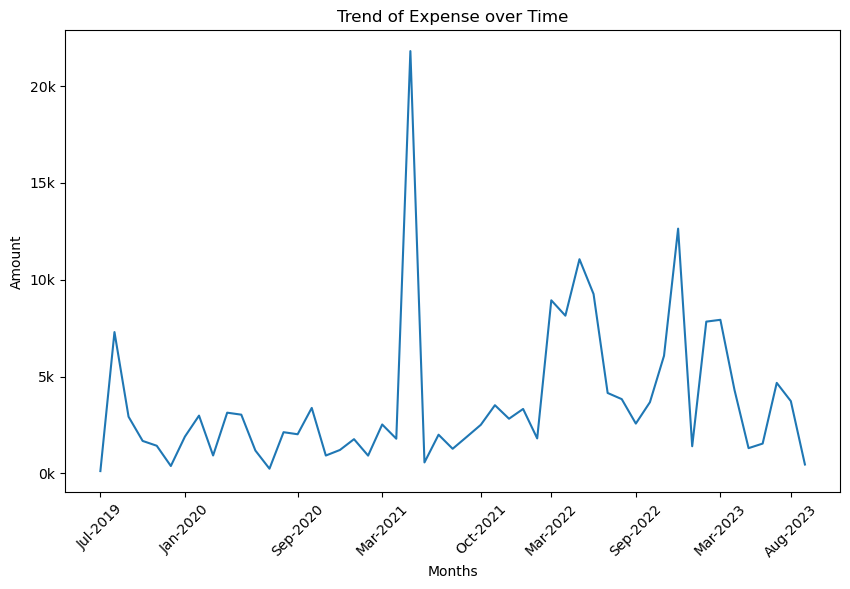

In [70]:
plt.figure(figsize = (10,6))
df_exp_mode.sort_values('date', inplace = True)

sns.lineplot(data = df_exp_mode, x = 'Year_month', y = 'Amount', errorbar = None)

plt.title('Trend of Expense over Time')
plt.xlabel('Months')
plt.ylabel('Amount')
# plt.legend(title = 'Tag')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))


n = 150
xticks = df_exp_mode['Year_month'].iloc[::n].tolist()
plt.xticks(xticks)
plt.xticks(xticks, rotation=45)

  
plt.show()

#### Cumulative expense over time

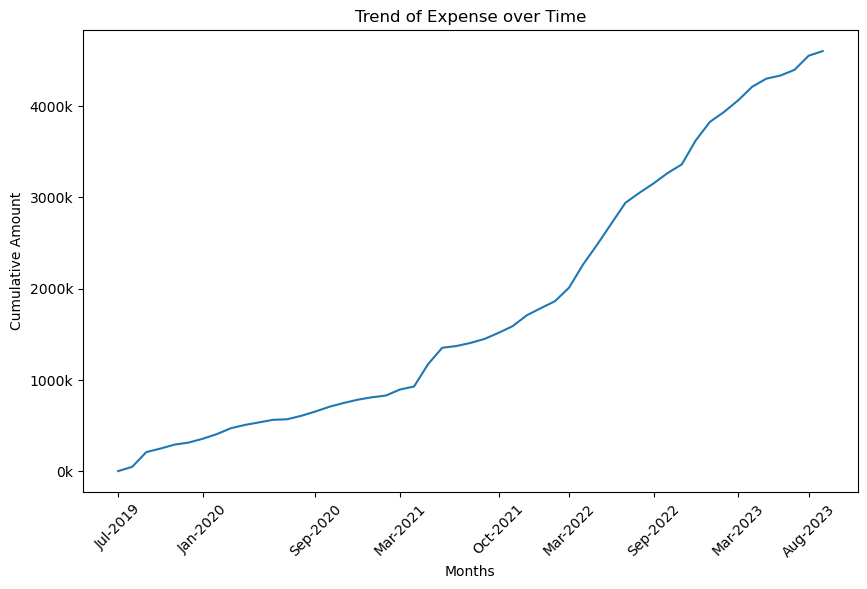

In [71]:
plt.figure(figsize = (10,6))
df_exp_mode.sort_values('date', inplace = True)

sns.lineplot(data = df_exp_mode, x = 'Year_month', y = 'Cum_Amount', errorbar = None)

plt.title('Trend of Expense over Time')
plt.xlabel('Months')
plt.ylabel('Cumulative Amount')
# plt.legend(title = 'Tag')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))


n = 150
xticks = df_exp_mode['Year_month'].iloc[::n].tolist()
plt.xticks(xticks)
plt.xticks(xticks, rotation=45)

  
plt.show()

#### Combining both dual axis graph

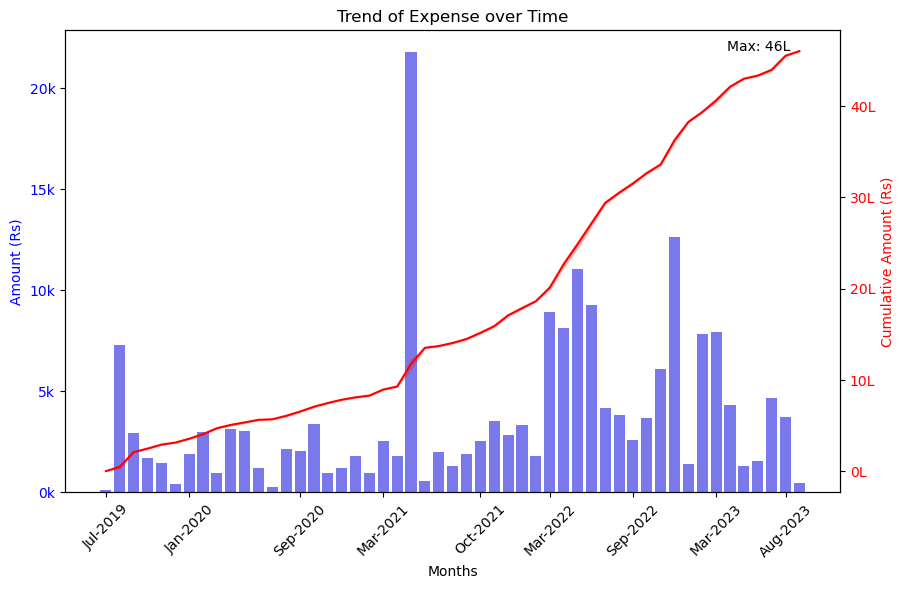

In [72]:
fig, ax1 = plt.subplots(figsize=(10, 6))
df_exp_mode.sort_values('date', inplace=True)

# Bar plot for 'Amount' on the first y-axis
sns.barplot(data=df_exp_mode, x='Year_month', y='Amount', ax=ax1, color='b', alpha=0.6, errorbar = None)

# Customize the first y-axis
ax1.set_title('Trend of Expense over Time')
ax1.set_xlabel('Months')
ax1.set_ylabel('Amount (Rs)', color='b')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Line plot for 'Cumulative Amount' on the second y-axis
sns.lineplot(data=df_exp_mode, x='Year_month', y='Cum_Amount', ax=ax2, color='r',  markersize=2)

# Customize the second y-axis
ax2.set_ylabel('Cumulative Amount (Rs)', color='r')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/100000)}L"))
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis ticks and rotation
n = 150
xticks = df_exp_mode['Year_month'].iloc[::n].tolist()
plt.xticks(xticks, rotation= 45)

ax1.set_xticklabels(xticks, rotation=45)


# Find the maximum values for both axes
max_amount = df_exp_mode['Amount'].max()
max_cum_amount = df_exp_mode['Cum_Amount'].max()

# Annotate the maximum values on the plot
# ax1.annotate(f"Max: {int(max_amount/1000)}k", xy=(xticks[-3], max_amount), xytext=(8, 0),
#              textcoords='offset points'
# #              , arrowprops=dict(arrowstyle="->")
#             )
ax2.annotate(f"Max: {int(max_cum_amount/100000)}L", xy=(xticks[-2], max_cum_amount), xytext=(8, 0),
             textcoords='offset points'
#              , arrowprops=dict(arrowstyle="->")
            )


plt.show()


## 1.2  Expense: UPI Mode

In [73]:
df_exp_mode_v2 = df_exp_v1.groupby(['Tag', 'Year_month', 'date', 'Mode'])['Amount'].agg('sum').reset_index().copy()
df_exp_mode_upi = df_exp_mode_v2[df_exp_mode_v2['Mode'] == 'UPI' ].copy()
df_exp_mode_upi.sort_values('date', inplace = True)
df_exp_mode_upi['Cum_Amount'] = df_exp_mode_upi['Amount'].cumsum()
df_exp_mode_upi.columns

Index(['Tag', 'Year_month', 'date', 'Mode', 'Amount', 'Cum_Amount'], dtype='object')

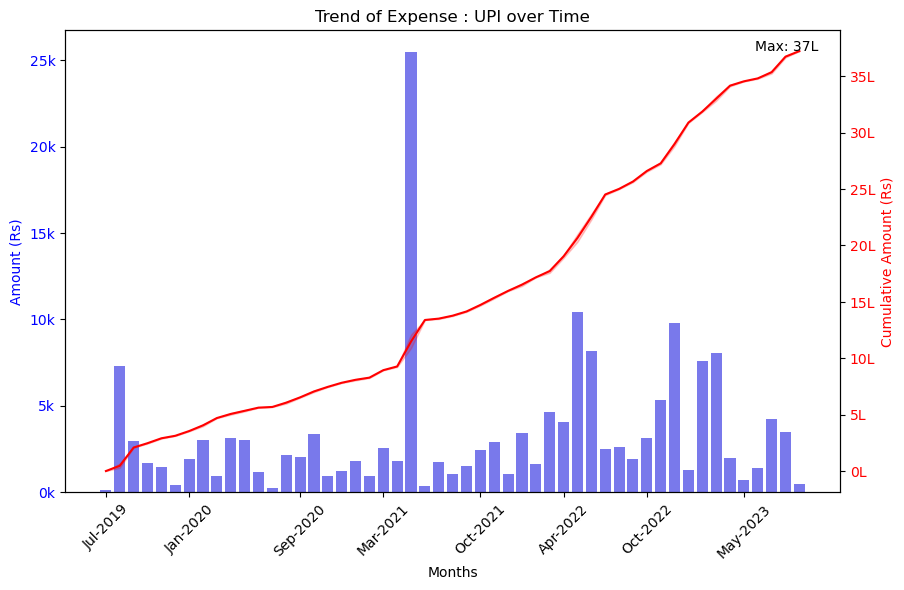

In [74]:
fig, ax1 = plt.subplots(figsize=(10, 6))


df_exp_mode_upi.sort_values('date', inplace=True)

# Bar plot for 'Amount' on the first y-axis
sns.barplot(data=df_exp_mode_upi, x='Year_month', y='Amount', ax=ax1, color='b', alpha=0.6, errorbar = None)

# Customize the first y-axis
ax1.set_title('Trend of Expense : UPI over Time')
ax1.set_xlabel('Months')
ax1.set_ylabel('Amount (Rs)', color='b')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Line plot for 'Cumulative Amount' on the second y-axis
sns.lineplot(data=df_exp_mode_upi, x='Year_month', y='Cum_Amount', ax=ax2, color='r',  markersize=2)

# Customize the second y-axis
ax2.set_ylabel('Cumulative Amount (Rs)', color='r')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/100000)}L"))
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis ticks and rotation
n = 150
xticks = df_exp_mode_upi['Year_month'].iloc[::n].tolist()
plt.xticks(xticks, rotation= 45)

ax1.set_xticklabels(xticks, rotation=45)


# Find the maximum values for both axes
max_amount = df_exp_mode_upi['Amount'].max()
max_cum_amount = df_exp_mode_upi['Cum_Amount'].max()

# Annotate the maximum values on the plot
# ax1.annotate(f"Max: {int(max_amount/1000)}k", xy=(xticks[-3], max_amount), xytext=(8, 0),
#              textcoords='offset points'
# #              , arrowprops=dict(arrowstyle="->")
#             )
ax2.annotate(f"Max: {int(max_cum_amount/100000)}L", xy=(xticks[-1], max_cum_amount), xytext=(8, 0),
             textcoords='offset points'
#              , arrowprops=dict(arrowstyle="->")
            )


plt.show()


## 1.3  Expense: Debit Card Mode

In [75]:
df_exp_mode_v2 = df_exp_v1.groupby(['Tag', 'Year_month', 'date', 'Mode'])['Amount'].agg('sum').reset_index().copy()
df_exp_mode_upi = df_exp_mode_v2[df_exp_mode_v2['Mode'] == 'Debit_Card' ].copy()
df_exp_mode_upi.sort_values('date', inplace = True)
df_exp_mode_upi['Cum_Amount'] = df_exp_mode_upi['Amount'].cumsum()
df_exp_mode_upi.head()

,Tag,Year_month,date,Mode,Amount,Cum_Amount
1102,Expenses,Nov-2021,2021-11-22,Debit_Card,483.0,483.0
1111,Expenses,Nov-2021,2021-11-28,Debit_Card,859.0,1342.0
1114,Expenses,Nov-2021,2021-11-30,Debit_Card,48.0,1390.0
311,Expenses,Dec-2021,2021-12-01,Debit_Card,32.0,1422.0
313,Expenses,Dec-2021,2021-12-02,Debit_Card,40.0,1462.0


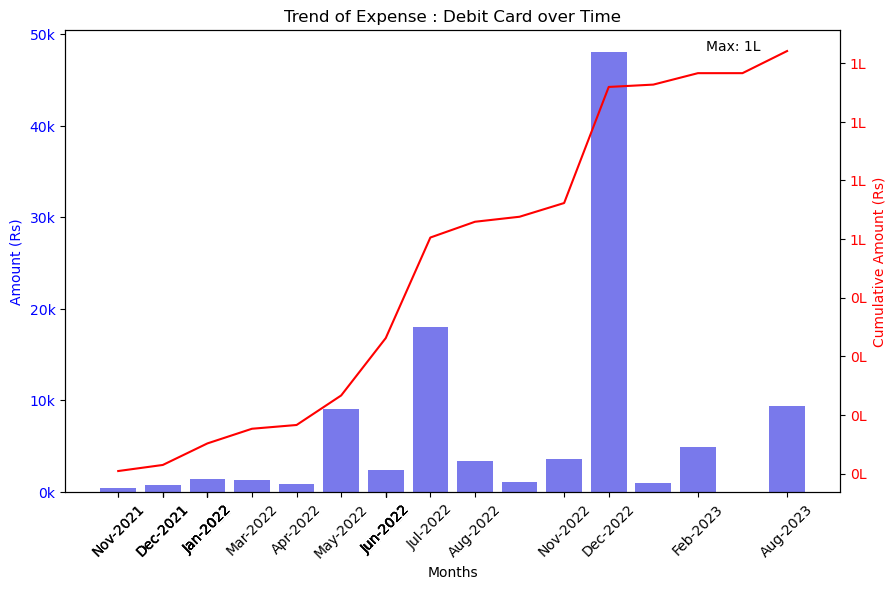

In [76]:
fig, ax1 = plt.subplots(figsize=(10, 6))


df_exp_mode_upi.sort_values('date', inplace=True)

# Bar plot for 'Amount' on the first y-axis
sns.barplot(data=df_exp_mode_upi, x='Year_month', y='Amount', ax=ax1, color='b', alpha=0.6, errorbar = None)

# Customize the first y-axis
ax1.set_title('Trend of Expense : Debit Card over Time')
ax1.set_xlabel('Months')
ax1.set_ylabel('Amount (Rs)', color='b')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Line plot for 'Cumulative Amount' on the second y-axis
sns.lineplot(data=df_exp_mode_upi, x='Year_month', y='Cum_Amount', ax=ax2, color='r',  markersize=2,errorbar = None)

# Customize the second y-axis
ax2.set_ylabel('Cumulative Amount (Rs)', color='r')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/100000)}L"))
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis ticks and rotation
n = 2
xticks = df_exp_mode_upi['Year_month'].iloc[::n].tolist()
plt.xticks(xticks, rotation= 45)

ax1.set_xticklabels(xticks, rotation=45)


# Find the maximum values for both axes
max_amount = df_exp_mode_upi['Amount'].max()
max_cum_amount = df_exp_mode_upi['Cum_Amount'].max()

# Annotate the maximum values on the plot
# ax1.annotate(f"Max: {int(max_amount/1000)}k", xy=(xticks[-3], max_amount), xytext=(8, 0),
#              textcoords='offset points'
# #              , arrowprops=dict(arrowstyle="->")
#             )
ax2.annotate(f"Max: {int(max_cum_amount/100000)}L", xy=(xticks[-2], max_cum_amount), xytext=(6, 0),
             textcoords='offset points'
#              , arrowprops=dict(arrowstyle="->")
            )


plt.show()


## 1.4  Expense: Credit Card Mode

In [77]:
df_exp_mode_v2 = df_exp_v1.groupby(['Tag', 'Year_month', 'date', 'Mode'])['Amount'].agg('sum').reset_index().copy()
df_exp_mode_upi = df_exp_mode_v2[df_exp_mode_v2['Mode'] == 'Credit_Card' ].copy()
df_exp_mode_upi.sort_values('date', inplace = True)
df_exp_mode_upi['Cum_Amount'] = df_exp_mode_upi['Amount'].cumsum()
df_exp_mode_upi.head()

,Tag,Year_month,date,Mode,Amount,Cum_Amount
951,Expenses,May-2021,2021-05-17,Credit_Card,799.00,799.00
952,Expenses,May-2021,2021-05-18,Credit_Card,520.00,1319.00
954,Expenses,May-2021,2021-05-20,Credit_Card,5000.00,6319.00
956,Expenses,May-2021,2021-05-22,Credit_Card,3724.02,10043.02
732,Expenses,Jun-2021,2021-06-08,Credit_Card,1.00,10044.02


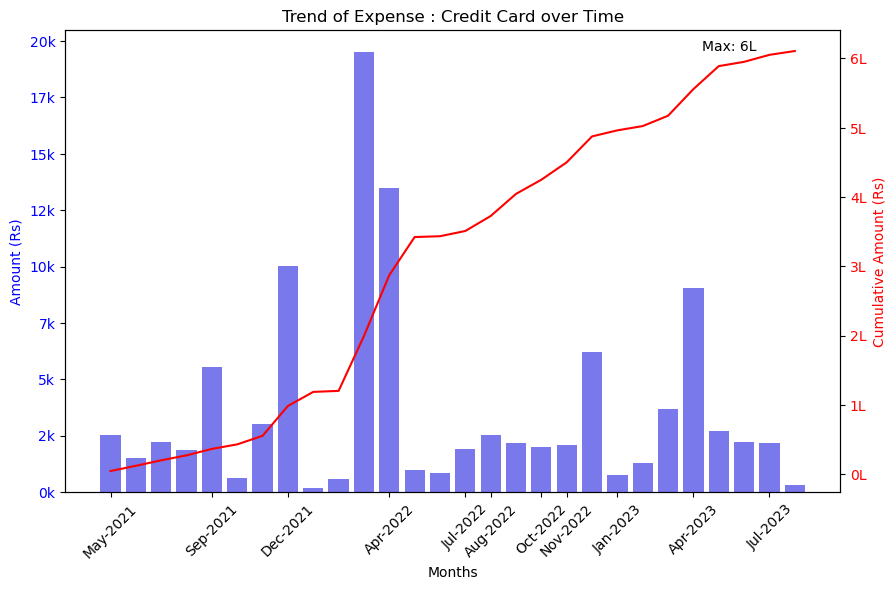

In [78]:
fig, ax1 = plt.subplots(figsize=(10, 6))


df_exp_mode_upi.sort_values('date', inplace=True)

# Bar plot for 'Amount' on the first y-axis
sns.barplot(data=df_exp_mode_upi, x='Year_month', y='Amount', ax=ax1, color='b', alpha=0.6, errorbar = None)

# Customize the first y-axis
ax1.set_title('Trend of Expense : Credit Card over Time')
ax1.set_xlabel('Months')
ax1.set_ylabel('Amount (Rs)', color='b')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Line plot for 'Cumulative Amount' on the second y-axis
sns.lineplot(data=df_exp_mode_upi, x='Year_month', y='Cum_Amount', ax=ax2, color='r',  markersize=2,errorbar = None)

# Customize the second y-axis
ax2.set_ylabel('Cumulative Amount (Rs)', color='r')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/100000)}L"))
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis ticks and rotation
n = 15
xticks = df_exp_mode_upi['Year_month'].iloc[::n].tolist()
plt.xticks(xticks, rotation= 45)

ax1.set_xticklabels(xticks, rotation=45)


# Find the maximum values for both axes
max_amount = df_exp_mode_upi['Amount'].max()
max_cum_amount = df_exp_mode_upi['Cum_Amount'].max()

# Annotate the maximum values on the plot
# ax1.annotate(f"Max: {int(max_amount/1000)}k", xy=(xticks[-3], max_amount), xytext=(8, 0),
#              textcoords='offset points'
# #              , arrowprops=dict(arrowstyle="->")
#             )
ax2.annotate(f"Max: {int(max_cum_amount/100000)}L", xy=(xticks[-2], max_cum_amount), xytext=(6, 0),
             textcoords='offset points'
#              , arrowprops=dict(arrowstyle="->")
            )


plt.show()


### Percentage contribution of modes in expenses.

In [79]:
df_expense_contri = df_viz.groupby(['Tag', 'date', 'Mode'])['Amount'].sum().reset_index().copy()
df_expense_contri = df_expense_contri[~df_expense_contri['Mode'].isin(['NetBanking', 'None'])]
df_expense_contri['date']=pd.to_datetime(df_expense_contri['date'])
# Truncate the dates to the start of each month
df_expense_contri['Month_Start'] = df_expense_contri['date'].dt.to_period('M').dt.to_timestamp()
df_expense_contri['Year_month'] = df_expense_contri['Month_Start'].dt.strftime('%y-%b')

In [80]:
df_pivot = df_expense_contri.pivot_table(index = ['Month_Start', 'Year_month'], 
                                         columns = ['Mode'], 
                                         values = 'Amount', 
                                         aggfunc = 'sum')
df_pivot.reset_index(inplace = True)
df_pivot.fillna(0, inplace = True)
df_pivot['Amount'] = df_pivot['ATM_Withdrawal'] + df_pivot['Credit_Card'] + df_pivot['Debit_Card'] + df_pivot['UPI'] 

In [81]:
df_pivot['UPI_p'] = df_pivot['UPI']*100.0/df_pivot['Amount']
df_pivot['ATM_p'] = df_pivot['ATM_Withdrawal']*100.0/df_pivot['Amount']
df_pivot['CC_p'] = df_pivot['Credit_Card']*100.0/df_pivot['Amount']
df_pivot['DC_p'] = df_pivot['Debit_Card']*100.0/df_pivot['Amount']
df_pivot.sort_values('Month_Start', inplace = True)
df_pivot['UPI_p'] = df_pivot['UPI_p'].round(2)
df_pivot['ATM_p'] = df_pivot['ATM_p'].round(2)
df_pivot['CC_p'] = df_pivot['CC_p'].round(2)
df_pivot['DC_p'] = df_pivot['DC_p'].round(2)

df_pivot.sort_values('Month_Start', inplace = True)
df_pivot.head()

Mode,Month_Start,Year_month,ATM_Withdrawal,Credit_Card,Debit_Card,UPI,Amount,UPI_p,ATM_p,CC_p,DC_p
0,2019-07-01,19-Jul,0.0,0.0,0.0,248.00,248.00,100.0,0.0,0.0,0.0
1,2019-08-01,19-Aug,0.0,0.0,0.0,145901.96,145901.96,100.0,0.0,0.0,0.0
2,2019-09-01,19-Sep,0.0,0.0,0.0,76148.00,76148.00,100.0,0.0,0.0,0.0
3,2019-10-01,19-Oct,0.0,0.0,0.0,48719.00,48719.00,100.0,0.0,0.0,0.0
4,2019-11-01,19-Nov,0.0,0.0,0.0,38643.69,38643.69,100.0,0.0,0.0,0.0


### Savings over time

In [82]:
df_exp_v2 = df_viz[df_viz['Tag'] == 'Savings'].sort_values(['date'], ascending = True)
df_exp_v2['Month_Start'] = pd.to_datetime(df_exp_v2['date']).dt.to_period('M').dt.to_timestamp()
df_exp_v2.head()

,email_id,subject,sender_mail,date_sent,plain_text_body,plain_text_body_v2,date_sent_new,timestamp,date,hour,...,day_of_month,year,month,month_text,Amount,Mode,Destination,Year_month,Tag,Month_Start
2071,3129,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Fri, 27 Nov 2020 14:45:53 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.10000.00 has been debited from account **4809 to VPA 9452961017@ybl on 27-11-20. Your UPI transaction reference number is 033236572331. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDon't Miss! \n\n\n\n\n\nCheck your updated November 2020 CIBIL Score \n\n\n\n\n\nFREE CIBIL Score>>\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n*Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 18-19 and No.1 on market capitalisation based on BSE data as on 31 Dec, 2019\n\n\n© HDFC Bank \n\n\n14Aug-2020_Animesh\n\n\n\n\n","HDFC BANK Dear Customer, Rs.10000.00 has been debited from account **4809 to VPA 9452961017@ybl on 27-11-20. Your UPI transaction reference number is 033236572331. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Don't Miss! Check your updated November 2020 CIBIL Score FREE CIBIL Score>> Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more *Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 18-19 and No.1 on market capitalisation based on BSE data as on 31 Dec, 2019 © HDFC Bank 14Aug-2020_Animesh",2020-11-27 14:45:53+05:30,2020-11-27 14:45:53+05:30,2020-11-27,14,...,27,2020,11,Nov,10000.0,UPI,9452961017@ybl,Nov-2020,Savings,2020-11-01
2072,3130,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Fri, 27 Nov 2020 14:46:08 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.8000.00 has been debited from account **4809 to VPA 9452961017@ybl on 27-11-20. Your UPI transaction reference number is 033240717119. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDo not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more\n\n\n*Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 18-19 and No.1 on market capitalisation based on BSE data as on 31 Dec, 2019\n\n\nÂ© HDFC Bank \n\n\n14Aug-2020_Animesh\n\n\n\n","HDFC BANK Dear Customer, Rs.8000.00 has been debited from account **4809 to VPA 9452961017@ybl on 27-11-20. Your UPI transaction reference number is 033240717119. Please call on 18002586161 to report if this transaction was not authorized by you. Warm Regards, HDFC Bank Do not share your internet banking username/password or Credit/ Debit Card number/ CVV/ OTP via e-mail or over the phone. HDFC Bank will never ask for it Know more *Based on Retail Loan book size (excluding mortgages). Source: Annual Reports FY 18-19 and No.1 on market capitalisation based on BSE data as on 31 Dec, 2019 Â© HDFC Bank 14Aug-2020_Animesh",2020-11-27 14:46:08+05:30,2020-11-27 14:46:08+05:30,2020-11-27,14,...,27,2020,11,Nov,8000.0,UPI,9452961017@ybl,Nov-2020,Savings,2020-11-01
2065,3122,View: Account update for your HDFC Bank A/c,HDFC Bank InstaAlerts <alerts@hdfcbank.net>,"Sat, 28 Nov 2020 23:17:45 +0530 (IST)","\n\n\n\n\n\n\n\n\nHDFC BANK\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDear Customer, Rs.20000.00 has been debited from accoun

In [83]:
df_sav = df_exp_v2.groupby(['Month_Start', 'Year_month'])['Amount'].sum().reset_index()

df_sav.sort_values('Month_Start', inplace = True)
df_sav = df_sav[df_sav['Month_Start'] >= '2023-01-01']
df_sav['Cum_Amount']=df_sav['Amount'].cumsum()
df_sav.head()

,Month_Start,Year_month,Amount,Cum_Amount
12,2023-01-01,Jan-2023,10000.0,10000.0
13,2023-03-01,Mar-2023,5000.0,15000.0
14,2023-04-01,Apr-2023,13414.0,28414.0
15,2023-05-01,May-2023,155000.0,183414.0
16,2023-06-01,Jun-2023,50000.0,233414.0


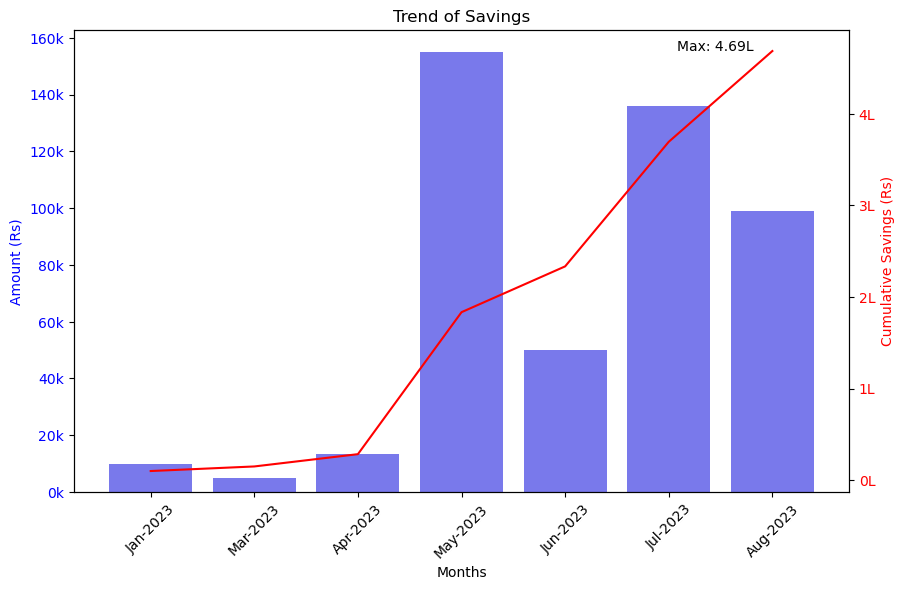

In [84]:
fig, ax1 = plt.subplots(figsize=(10, 6))


df_sav.sort_values('Month_Start', inplace=True)

# Bar plot for 'Amount' on the first y-axis
sns.barplot(data=df_sav, x='Year_month', y='Amount', ax=ax1, color='b', alpha=0.6, errorbar = None)

# Customize the first y-axis
ax1.set_title('Trend of Savings')
ax1.set_xlabel('Months')
ax1.set_ylabel('Amount (Rs)', color='b')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/1000)}k"))
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Line plot for 'Cumulative Amount' on the second y-axis
sns.lineplot(data=df_sav, x='Year_month', y='Cum_Amount', ax=ax2, color='r',  markersize=2,errorbar = None)

# Customize the second y-axis
ax2.set_ylabel('Cumulative Savings (Rs)', color='r')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x/100000)}L"))
ax2.tick_params(axis='y', labelcolor='r')

# Set x-axis ticks and rotation
n = 1
xticks = df_sav['Year_month'].iloc[::n].tolist()
plt.xticks(xticks, rotation= 45)

ax1.set_xticklabels(xticks, rotation=45)


# Find the maximum values for both axes
max_amount = df_sav['Amount'].max()
max_cum_amount = df_sav['Cum_Amount'].max()

# Annotate the maximum values on the plot
# ax1.annotate(f"Max: {int(max_amount/1000)}k", xy=(xticks[-3], max_amount), xytext=(8, 0),
#              textcoords='offset points'
# #              , arrowprops=dict(arrowstyle="->")
#             )
ax2.annotate(f"Max: {round(float(max_cum_amount/100000),2)}L", xy=(xticks[-2], max_cum_amount), xytext=(6, 0),
             textcoords='offset points'
#              , arrowprops=dict(arrowstyle="->")
            )


plt.show()
